## Simple Linear Regression

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
data = pd.read_csv('../../03_data-visualization/02_lab-matplotlib-seaborn/your-code/Fitbit2.csv') 
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


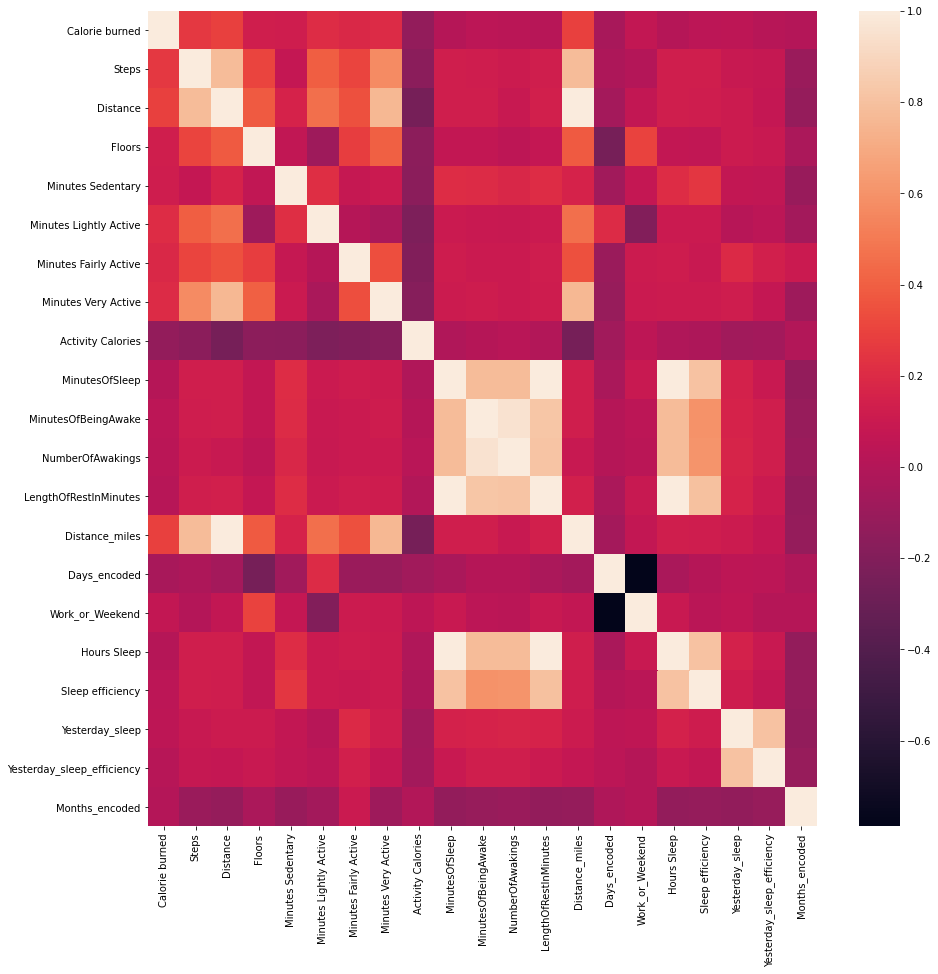

In [169]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr())

### Simple Regression Plot

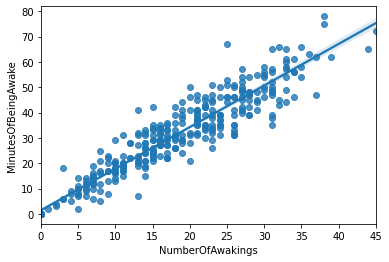

In [177]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)


[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

### Estimating OLS using statsmodels

In [173]:
import statsmodels.api as sm

In [180]:
Y = data['MinutesOfBeingAwake']
X = data['NumberOfAwakings']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                         10:44:13   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Using 'Work_or_Weekend' as an explanatory variable

In [181]:
data['Work_or_Weekend'].value_counts()

1    262
0    105
Name: Work_or_Weekend, dtype: int64

In [185]:
pd.pivot_table(data, index = ['Work_or_Weekend'], values='MinutesOfBeingAwake')

,MinutesOfBeingAwake
Work_or_Weekend,
0,26.895238
1,28.454198


In [187]:
Y = data['MinutesOfBeingAwake']
X = data['Work_or_Weekend']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.905
Method:                  Least Squares   F-statistic:                     1754.
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):          1.33e-187
Time:                         10:47:30   Log-Likelihood:                -1158.0
No. Observations:                  367   AIC:                             2322.
Df Residuals:                      364   BIC:                             2334.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2924      0.705      1.834      0.068      -0.094       2.678
NumberOfAwakings     1.6402      0.028     59.178      0.000       1.586       1.695
Work_or_Weekend      0.2111      0.659      0.320      0.749      -1.085       1.507
==============================================================================
Omnibus:                       18.112   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.691
Skew:                           0.295   Prob(JB):                     7.97e-08
Kurtosis:                       4.338   Cond. No.                         57.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Using an indicator for whether sleep was efficient (above 90) as an explanatory variable


In [198]:
X = pd.DataFrame()
X['EfficientSleep'] = np.where(data['Sleep efficiency']>90, 1, 0)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.029
Model:                             OLS   Adj. R-squared:                  0.026
Method:                  Least Squares   F-statistic:                     10.72
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):            0.00116
Time:                         10:52:05   Log-Likelihood:                -1586.6
No. Observations:                  367   AIC:                             3177.
Df Residuals:                      365   BIC:                             3185.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             30.9137      1.304     23.710      0.000      28.350      33.478
EfficientSleep    -6.2725      1.916     -3.274      0.001     -10.040      -2.505
==============================================================================
Omnibus:                       17.383   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.279
Skew:                          -0.251   Prob(JB):                      0.00586
Kurtosis:                       2.351   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Using 'Days' (categorical) as an explanatory variable


In [205]:
X = pd.get_dummies(data['Days'], drop_first = True)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.8900
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):              0.502
Time:                         10:56:18   Log-Likelihood:                -1589.2
No. Observations:                  367   AIC:                             3192.
Df Residuals:                      360   BIC:                             3220.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0370      2.525     11.102      0.000      23.071      33.004
Monday        -2.4793      3.606     -0.688      0.492      -9.570       4.612
Saturday      -1.3767      3.588     -0.384      0.701      -8.433       5.680
Sunday        -0.9024      3.606     -0.250      0.803      -7.993       6.188
Thursday       4.9630      3.606      1.376      0.170      -2.128      12.054
Tuesday       -1.1332      3.606     -0.314      0.753      -8.224       5.958
Wednesday      0.7514      3.606      0.208      0.835      -6.339       7.842
==============================================================================
Omnibus:                       25.696   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.589
Skew:                           0.062   Prob(JB):                      0.00827
Kurtosis:                       2.218   Cond. No.                         7.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimating OLS parameters using scipy.stats

In [ ]:
from scipy.stats import linregress
help(linregress)

In [ ]:
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err  = linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

#### Predictions

In [ ]:
predictions = [intercept + slope*x for x in X]
print(predictions)

#### Calculating residuals

In [ ]:
residuals = [Y[i] - predictions[i] for i in range(len(Y))]

## Using sklearn

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
help(linear_model.LinearRegression)

In [ ]:
X = X.values.reshape(-1, 1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

In [ ]:
print(lm.intercept_)
print(lm.coef_)
predictions = lm.predict(X)
print(r2_score(Y, predictions))
print(mean_squared_error(Y, predictions))


## Logistic Regression

In [216]:
Y = pd.DataFrame(np.where(data['Sleep efficiency']>90, 1, 0))
X = data['MinutesOfBeingAwake']
X = sm.add_constant(X)
model = sm.Logit(Y, X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.676012
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      0   No. Observations:                  367
Model:                          Logit   Df Residuals:                      365
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                 0.02089
Time:                        11:06:34   Log-Likelihood:                -248.10
converged:                       True   LL-Null:                       -253.39
Covariance Type:            nonrobust   LLR p-value:                  0.001138
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3719      0.193      1.930      0.054      -0.006       0.750
MinutesOfBeingAwake    -0.0187      0.006     -3.202      0.001      -0.030      -0.007
=======================================================================================
"""

In [211]:
results.predict(X)

0      0.471448
1      0.429803
2      0.380273
3      0.448225
4      0.300747
         ...   
362    0.438993
363    0.494796
364    0.429803
365    0.398055
366    0.333117
Length: 367, dtype: float64